In [1]:
import numpy as np

A simple FF NN is represented as wx+b, where W,x,b are matrices. It is "dot-producted" and applied with a non linear function 

In [5]:
class NeuralNetwork:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs):
        inputs = self.sigmoid(np.dot(self.weights, inputs) + self.biases)
        return inputs

In [6]:
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = NeuralNetwork(weights, bias)

In [7]:
x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.forward(x))

0.9990889488055994


Lets add in some hidden layer - a layer which is between the input and the output layer - there could be many !

In [8]:
# creating hidden layer h1, h2 and o1(output layer)

In [9]:
class NeuralNetworkWithHiddenLayer: ## using the previous class
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = NeuralNetwork(weights, bias)
        self.h2 = NeuralNetwork(weights, bias)
        self.o1 = NeuralNetwork(weights, bias)

    def forward(self, inputs):
        out_h1 = self.h1.forward(inputs)
        out_h2 = self.h2.forward(inputs)
        out_o1 = self.o1.forward(np.array([out_h1, out_h2]))
        return out_o1

In [10]:
new_n = NeuralNetworkWithHiddenLayer()
print(new_n.forward(x))

0.7216325609518421


Lets train this !!

In [12]:
# basically we are minimising the loss of MSE as the cost function

def mean_squared_error(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

In [13]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])
print(mean_squared_error(y_true, y_pred))

0.5


In [15]:
# so if we have a flow in such a way that, w1b1+w2b1 = h1, w3b2+w4b2 = h2, h1h2 = o1

# then dl/dw1 = dl/dy_pred * dy_pred/dh1 * dh1/dw1 as per chain rule

# dy_pred/dh1 = f(w5h1+w6h2+b3) - ignoring the h2 as it is not connected to w1

# dh1/dw1 = f(w1x1+w2x2+b1) - sigmoid


# so basically, dl/dw1 = dl/dy_pred * dy_pred/dh1 * dh1/dw1 is derived as per chain rule - we'll proceed if not in lobotomy lol

SGD

In [17]:
# w1 = w1 - lr * dl/dw1

# if dl/dw1 is positive, then w1 will decrease and if negative, w1 will increase

In [32]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class NeuralNetworkWithHiddenLayerWithWeightsUpdateV2:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    loss_list = []
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))
        loss_list.append(loss)

    return loss_list


In [23]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

In [33]:

network_v2 = NeuralNetworkWithHiddenLayerWithWeightsUpdateV2()
loss_list = network_v2.train(data, all_y_trues)

Epoch 0 loss: 0.485
Epoch 10 loss: 0.389
Epoch 20 loss: 0.124
Epoch 30 loss: 0.070
Epoch 40 loss: 0.049
Epoch 50 loss: 0.040
Epoch 60 loss: 0.034
Epoch 70 loss: 0.030
Epoch 80 loss: 0.027
Epoch 90 loss: 0.025
Epoch 100 loss: 0.022
Epoch 110 loss: 0.021
Epoch 120 loss: 0.019
Epoch 130 loss: 0.018
Epoch 140 loss: 0.017
Epoch 150 loss: 0.016
Epoch 160 loss: 0.015
Epoch 170 loss: 0.014
Epoch 180 loss: 0.013
Epoch 190 loss: 0.012
Epoch 200 loss: 0.012
Epoch 210 loss: 0.011
Epoch 220 loss: 0.011
Epoch 230 loss: 0.010
Epoch 240 loss: 0.010
Epoch 250 loss: 0.009
Epoch 260 loss: 0.009
Epoch 270 loss: 0.009
Epoch 280 loss: 0.008
Epoch 290 loss: 0.008
Epoch 300 loss: 0.008
Epoch 310 loss: 0.008
Epoch 320 loss: 0.007
Epoch 330 loss: 0.007
Epoch 340 loss: 0.007
Epoch 350 loss: 0.007
Epoch 360 loss: 0.006
Epoch 370 loss: 0.006
Epoch 380 loss: 0.006
Epoch 390 loss: 0.006
Epoch 400 loss: 0.006
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.005
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

<AxesSubplot: >

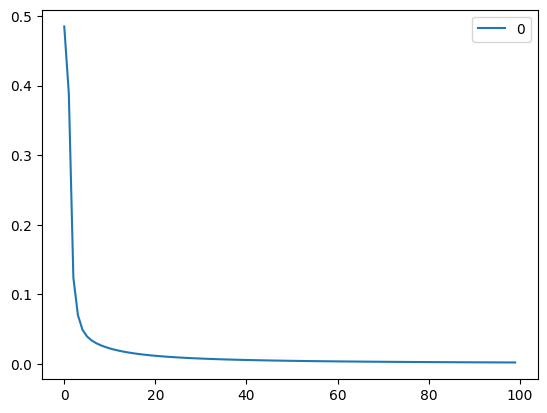

In [37]:
import pandas as pd

pd.DataFrame(loss_list).plot()

In [39]:
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network_v2.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network_v2.feedforward(frank)) # 0.039 - M

Emily: 0.951
Frank: 0.038


In [41]:
# success! - we have a working model - Thank you copilot! 